In [1]:
! pip install --upgrade --user numpy scipy matplotlib ipython jupyter pandas sympy nose waipy netcdf4 
! pip install --user --upgrade pixiedust

Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: matplotlib in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: ipython in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: jupyter in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: sympy in /gpfs/global_fs01/s

In [2]:
from io import StringIO
from scipy import signal
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import waipy as wa
import pixiedust
import brunel

Pixiedust database opened successfully


In [3]:
# The code was removed by DSX for sharing.

,HHMMS,TRX_YZL2_Resp,WebContRsp,RespHTTP
0,11.00.00,0.159995,3.311750,7.883
1,11.00.01,0.120319,4.946857,NaN
2,11.00.02,0.201928,4.873429,NaN
3,11.00.03,0.210998,5.931583,NaN
4,11.00.04,0.145653,3.952400,NaN


In [4]:
conv_arr= df_data_1.values
Tempo = np.squeeze(np.asarray(np.delete(conv_arr,[1,2,3],axis=1)))
TRX_YZL2_Resp = np.squeeze(np.asarray(np.delete(conv_arr,[0,2,3],axis=1)))
WebContRsp = np.squeeze(np.asarray(np.delete(conv_arr,[0,1,3],axis=1)))
#RespHTTP = np.squeeze(np.asarray(np.delete(conv_arr,[0,1,2,3],axis=1)))
#print(TRX_YZL2_Resp)
#print(WebContRsp)


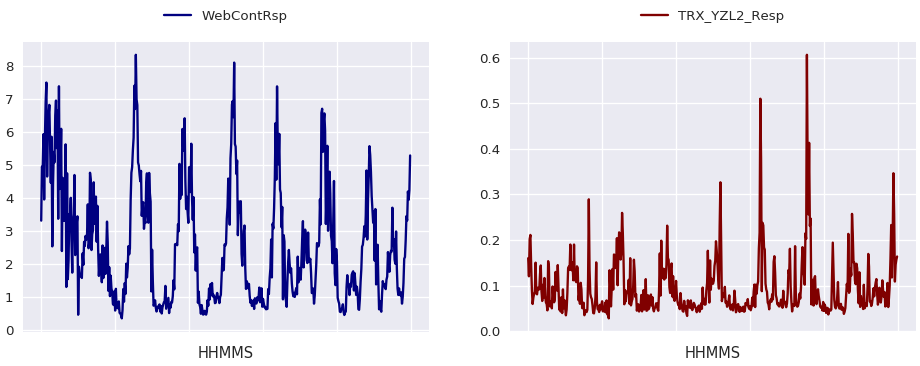

In [ ]:
display(df_data_1)

In [6]:
%brunel data('df_data_1') x(HHMMS) y(TRX_YZL2_Resp, WebContRsp) line title("Response time 2015/12/01 (sampling 1 seconds)") axes(x:'Time', y:'Response(sec.)') legends(auto)

<IPython.core.display.Javascript object>

In [7]:
f, Pxx_spec = signal.welch(TRX_YZL2_Resp, window ='blackman',fs=1.0,nperseg =512,  scaling='spectrum') 
f1, Pxx_spec1 = signal.welch(WebContRsp, window ='blackman',fs=1.0, nperseg =512,  scaling='spectrum') 
#print(f1)
#print(Pxx_spec1)

/gpfs/fs01/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


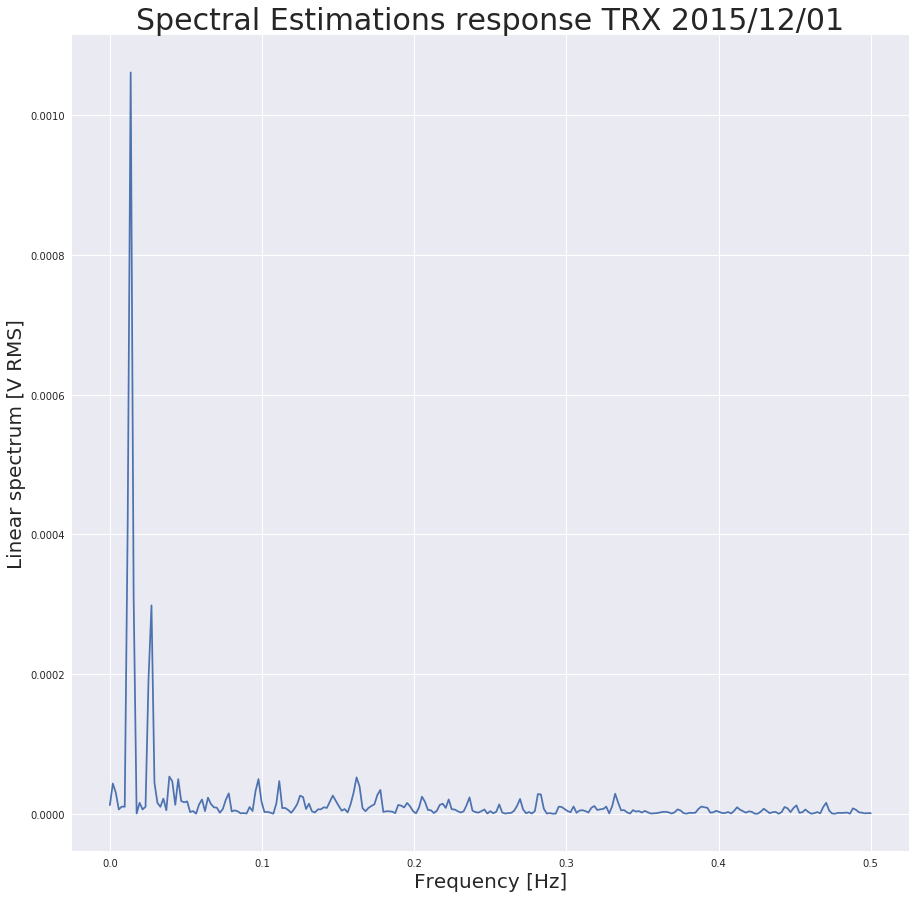

In [8]:
plt.figure(figsize=(15,15))
#plt.semilogy(f, np.absolute(Pxx_spec), f, np.absolute(Pxx_spec1) )
plt.plot(f, np.absolute(Pxx_spec))
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Linear spectrum [V RMS]', fontsize=20)
plt.title('Spectral Estimations response TRX 2015/12/01', fontsize=30)
plt.show()

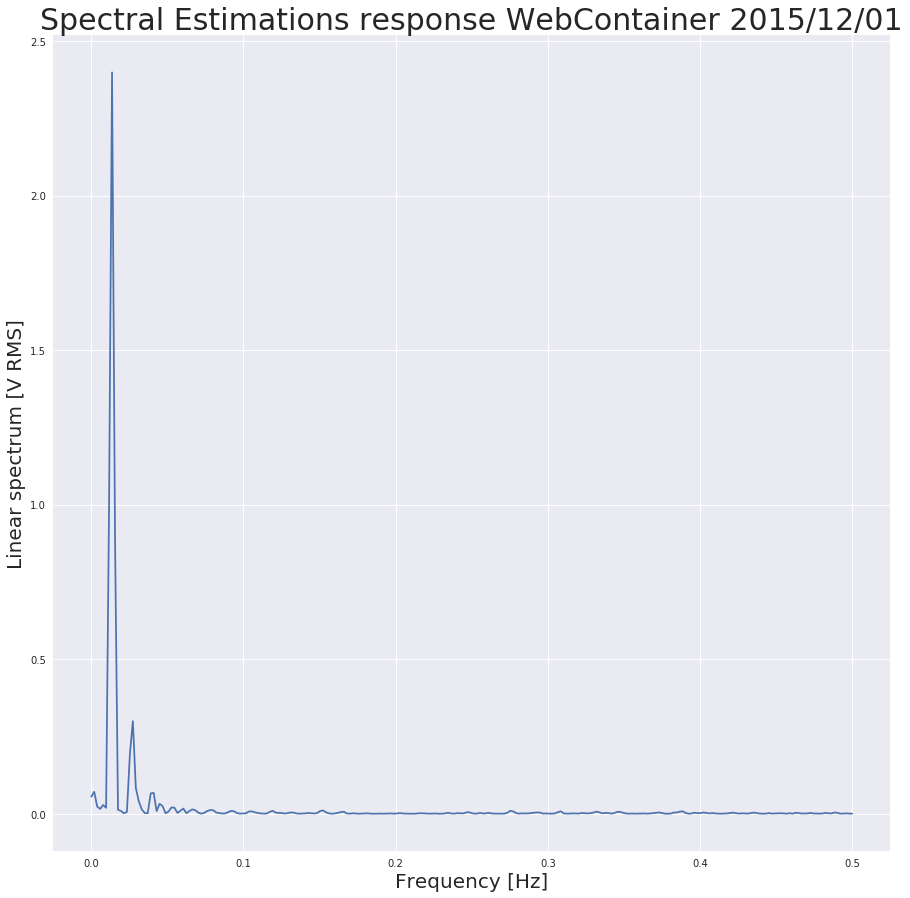

In [9]:
plt.figure(figsize=(15,15))
#plt.semilogy(f, np.absolute(Pxx_spec), f, np.absolute(Pxx_spec1) )
plt.plot(f, np.absolute(Pxx_spec1) )
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Linear spectrum [V RMS]', fontsize=20)
plt.title('Spectral Estimations response WebContainer 2015/12/01', fontsize=30)
plt.show()


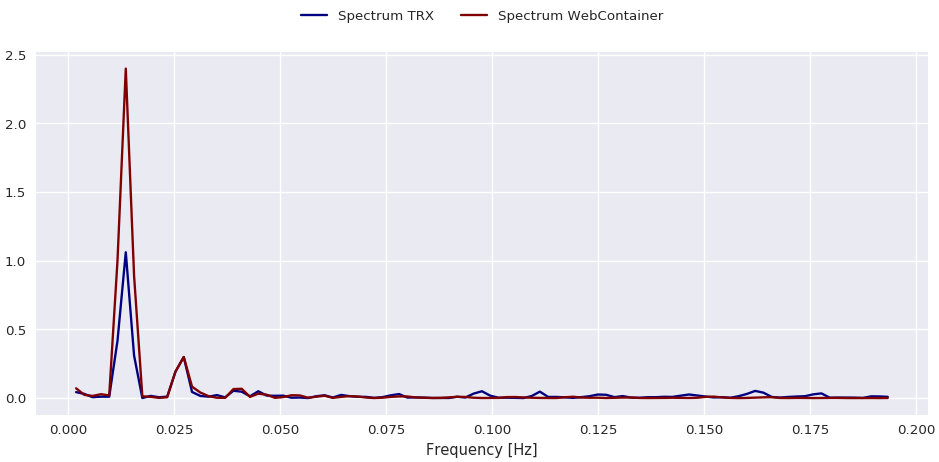

In [15]:
pd_spectre=pd.DataFrame(data={'Spectrum WebContainer':np.squeeze(np.absolute(Pxx_spec1[1:100])), 'Spectrum TRX':np.squeeze(np.absolute(Pxx_spec[1:100]))*1000,'Frequency [Hz]':f[1:100]},dtype=float)
#pd_spectre.head()
display(pd_spectre)

In [16]:
pd.set_option('display.max_rows', 512) 
pd_spectre.head(256)

,Frequency [Hz],Spectrum TRX,Spectrum WebContainer
0,0.001953,0.043311,0.070979
1,0.003906,0.030021,0.023228
2,0.005859,0.006172,0.015550
3,0.007812,0.010300,0.028104
4,0.009766,0.009993,0.019360
5,0.011719,0.417302,1.001596
6,0.013672,1.061560,2.398626
7,0.015625,0.309709,0.891937
8,0.017578,0.000311,0.012785
9,0.019531,0.015717,0.009109



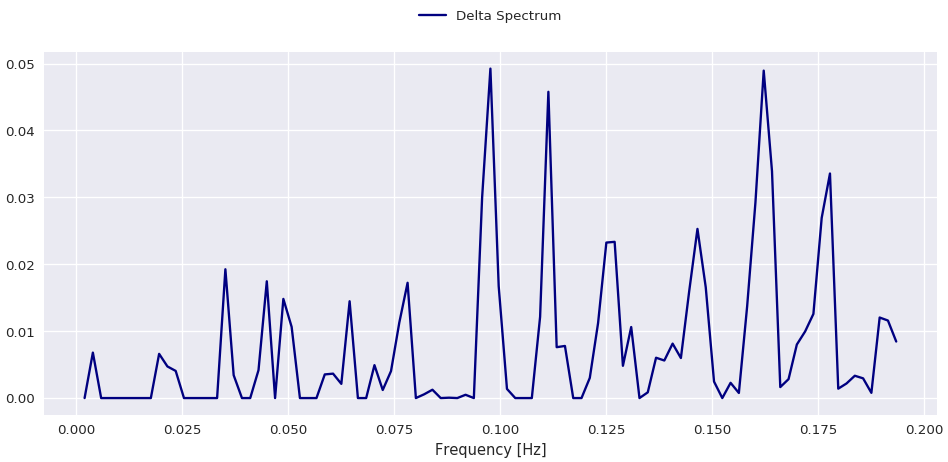

In [11]:
diff=np.absolute(Pxx_spec[1:100]*1000)-np.absolute(Pxx_spec1[1:100])
diff[np.where(diff<0)] = 0
pd_spectre=pd.DataFrame(data={'Delta Spectrum':np.squeeze(diff),'Frequency [Hz]':f[1:100]},dtype=float)
#pd_spectre.head()
display(pd_spectre)

In [12]:
pd.set_option('display.max_rows', 512) 
pd_spectre.head(256)

,Delta Spectrum,Frequency [Hz]
0,0.000000,0.001953
1,0.006793,0.003906
2,0.000000,0.005859
3,0.000000,0.007812
4,0.000000,0.009766
5,0.000000,0.011719
6,0.000000,0.013672
7,0.000000,0.015625
8,0.000000,0.017578
9,0.006608,0.019531


In [13]:
corr = signal.correlate(WebContRsp,TRX_YZL2_Resp,mode='same',method='auto')

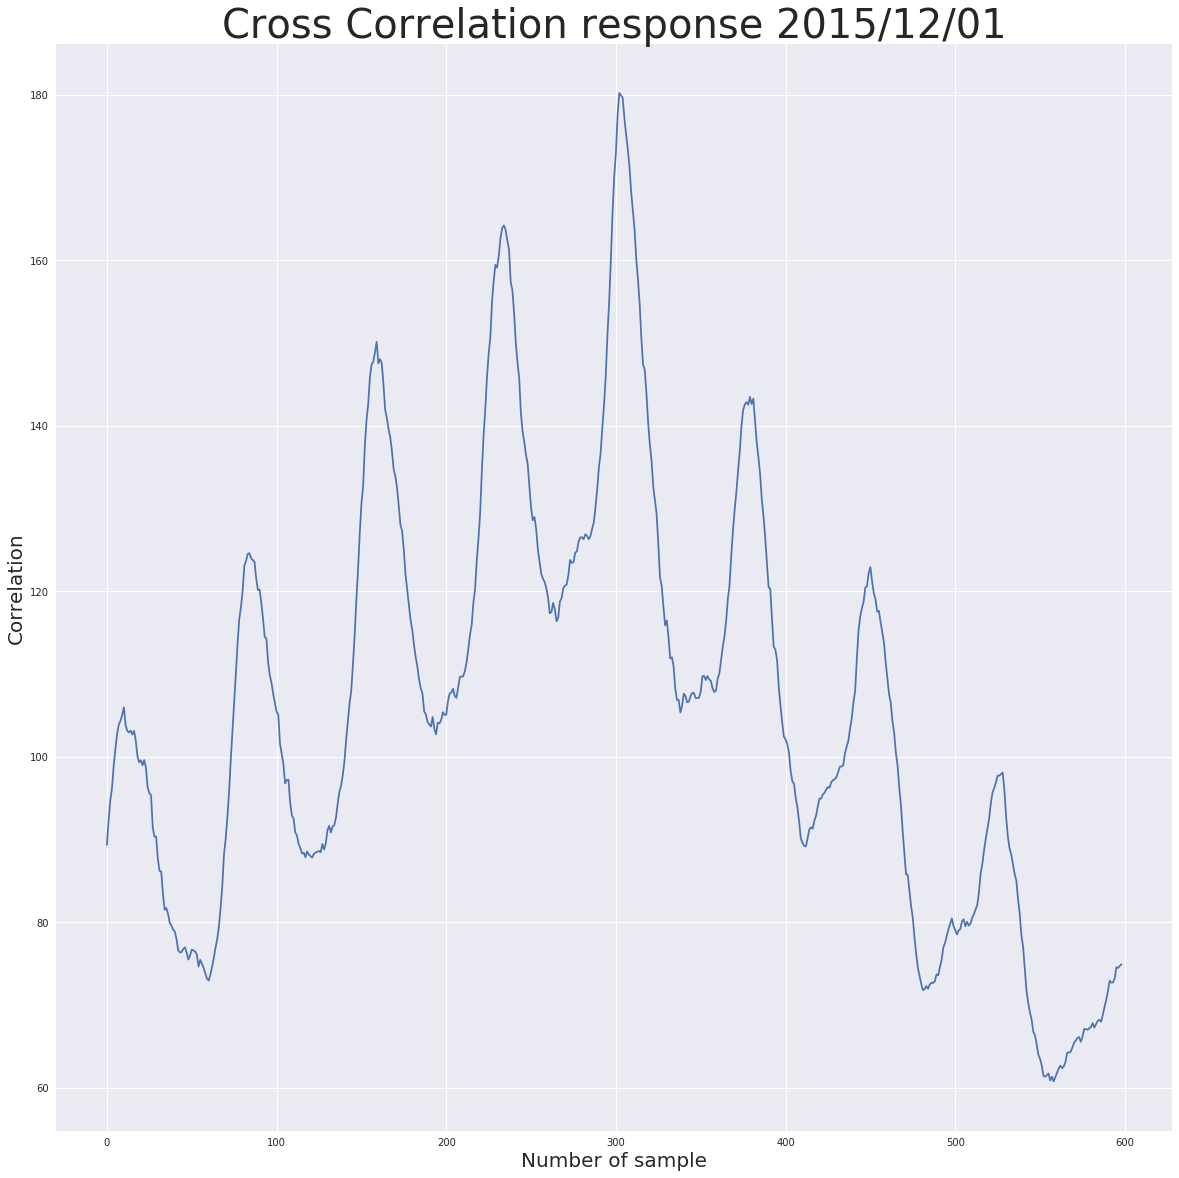

In [14]:
plt.figure(figsize=(20,20))
plt.plot(corr)
#plt.plot(wavelength, np.absolute(Pxx_spec), wavelength, np.absolute(Pxx_spec1)  )
plt.xlabel('Number of sample', fontsize=20)
plt.ylabel('Correlation', fontsize=20)
plt.title('Cross Correlation response 2015/12/01', fontsize=40)
plt.show()